In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/psam_p21.csv")

C:\Users\ger225\AppData\Local\Temp\ipykernel_25840\2182210762.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/psam_p21.csv")


In [3]:
df

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2014000000017,6,1,1800,3,21,1070673,13,42,...,14,5,5,32,15,10,11,15,11,26
1,P,2014000000017,6,2,1800,3,21,1070673,14,47,...,12,4,4,25,22,15,14,13,15,29
2,P,2014000000017,6,3,1800,3,21,1070673,13,13,...,10,3,4,24,21,11,13,13,11,25
3,P,2014000000017,6,4,1800,3,21,1070673,13,8,...,11,3,3,24,22,12,13,13,13,25
4,P,2014000000076,6,1,2500,3,21,1070673,43,43,...,11,76,46,68,73,41,70,13,38,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225035,P,2018HU1400701,6,1,2300,3,21,1013097,13,49,...,14,4,13,3,4,4,4,18,14,9
225036,P,2018HU1400701,6,2,2300,3,21,1013097,28,50,...,23,6,20,7,11,9,10,48,30,34
225037,P,2018HU1400701,6,3,2300,3,21,1013097,8,6,...,10,2,6,2,2,3,3,11,10,7
225038,P,2018HU1400802,6,1,2800,3,21,1013097,16,82,...,29,16,17,16,4,21,30,14,20,20


In [4]:
df['AGEP']

0         42
1         47
2         13
3          8
4         43
          ..
225035    49
225036    50
225037     6
225038    82
225039    47
Name: AGEP, Length: 225040, dtype: int64

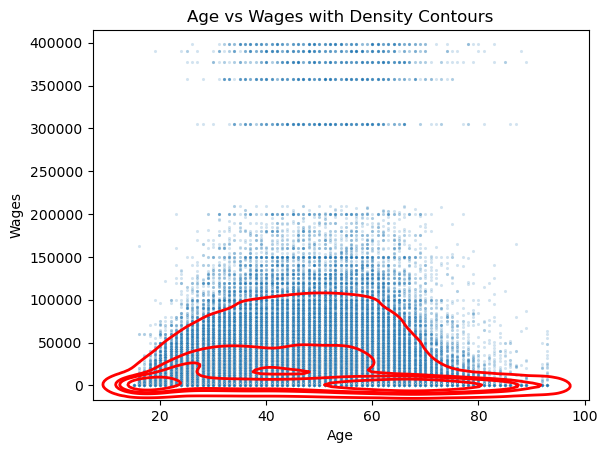

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with density contours for Age (AGEP) vs Wages (WAGP)
sns.scatterplot(data=df, x='AGEP', y='WAGP', alpha=0.2, s=5)
sns.kdeplot(data=df, x='AGEP', y='WAGP', levels=5, color='red', linewidths=2)
plt.title('Age vs Wages with Density Contours')
plt.xlabel('Age')
plt.ylabel('Wages')
plt.show()

In [6]:
age_totals = df['AGEP', 'WAGP'].groupby('AGE').agg(sum)

KeyError: ('AGEP', 'WAGP')

In [ ]:
avg_wages_by_age = df.groupby('AGEP')['WAGP'].agg()

In [8]:
avg_wages_by_age

AGEP
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
87    1127.193501
88     879.039451
89    1390.801688
92     261.898017
93     519.817352
Name: WAGP, Length: 92, dtype: float64

<Axes: xlabel='AGEP'>

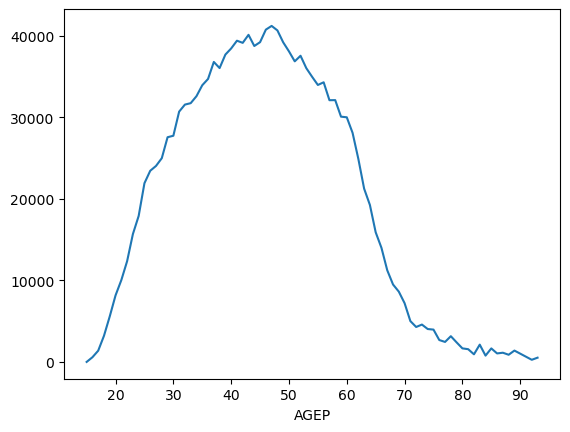

In [9]:
avg_wages_by_age.plot()

In [10]:
wage_stats_by_age = df.groupby('AGEP')['WAGP'].agg([
    ('mean', 'mean'),
    ('p25', lambda x: x.quantile(0.25)),
    ('p75', lambda x: x.quantile(0.75))
]).reset_index()

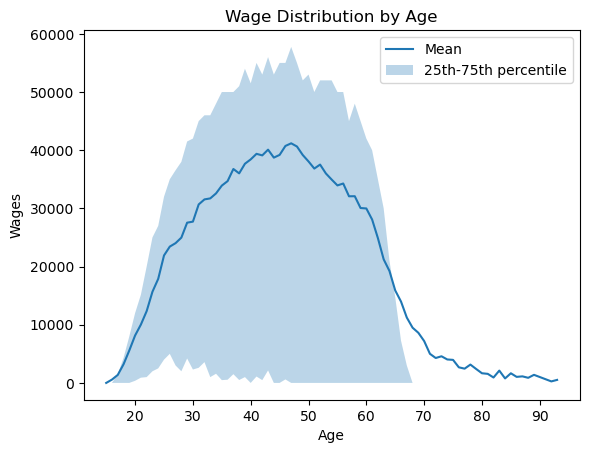

In [11]:
sns.lineplot(data=wage_stats_by_age, x='AGEP', y='mean', label='Mean')
plt.fill_between(wage_stats_by_age['AGEP'], 
                 wage_stats_by_age['p25'], 
                 wage_stats_by_age['p75'], 
                 alpha=0.3, label='25th-75th percentile')
plt.xlabel('Age')
plt.ylabel('Wages')
plt.title('Wage Distribution by Age')
plt.legend()
plt.show()